## References
[1] https://alefram.github.io/posts/Basic-inverse-kinematics-in-Mujoco

In [2]:
import numpy as np
import mujoco
import mujoco.viewer as viewer
import mediapy as media

from ik.gradient_descent import GradientDescentIK
from ik.gauss_newton import GaussNewtonIK
from ik.levenberg_marquardt import LevenbegMarquardtIK


In [3]:
MJCF_path = ("./simulation/low_cost_robot/scene.xml")
model = mujoco.MjModel.from_xml_path(MJCF_path)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

In [4]:
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 1

## Testing

Target => [0.008728 0.105265 0.053894]
Results
initial point => [0.008728 0.105265 0.053894]
Desire point => [0.008728 0.105265 0.053894] 



Initial position,Desire end effector position

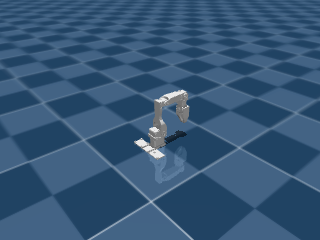
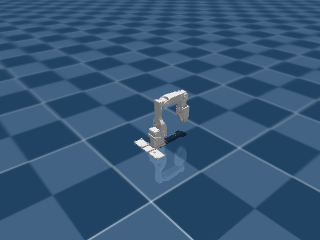

In [5]:
#Put a position of the joints to get a test point
pi = np.pi
data.qpos = [0, 0, 0, 0, 0, 0]

#Initial joint position
qpos0 = data.qpos.copy()

#Step the simulation.
mujoco.mj_forward(model, data)

#Use the last piece as an "end effector" to get a test point in cartesian 
# coordinates
target = data.site('TCP').xpos
print("Target =>",target)

#Plot results
print("Results")
mujoco.mj_resetDataKeyframe(model, data, 1)
mujoco.mj_forward(model, data)
init_point = data.site('TCP').xpos.copy()
renderer.update_scene(data, camera)
target_plot = renderer.render()

data.qpos = qpos0
mujoco.mj_forward(model, data)
result_point = data.site('TCP').xpos.copy()
renderer.update_scene(data, camera)
result_plot = renderer.render()

print("initial point =>", init_point)
print("Desire point =>", result_point, "\n")

images = {
    'Initial position': target_plot,
    ' Desire end effector position': result_plot,
}

media.show_images(images)

## Gradient descent

error:[ 0.09101777 -0.00532867  0.04589732]
error:[ 0.09076368 -0.00539238  0.0456886 ]
error:[ 0.09050973 -0.00545613  0.04547984]
error:[ 0.09025592 -0.0055199   0.04527106]
error:[ 0.09000224 -0.00558368  0.04506226]
error:[ 0.0897487  -0.00564746  0.04485343]
error:[ 0.08949528 -0.00571122  0.0446446 ]
error:[ 0.08924199 -0.00577495  0.04443576]
error:[ 0.08898883 -0.00583863  0.04422691]
error:[ 0.0887358  -0.00590226  0.04401808]
error:[ 0.08848289 -0.00596582  0.04380925]
error:[ 0.08823011 -0.0060293   0.04360045]
error:[ 0.08797745 -0.00609269  0.04339166]
error:[ 0.08772492 -0.00615598  0.0431829 ]
error:[ 0.0874725  -0.00621914  0.04297418]
error:[ 0.08722021 -0.00628218  0.0427655 ]
error:[ 0.08696805 -0.00634508  0.04255687]
error:[ 0.086716   -0.00640783  0.04234829]
error:[ 0.08646409 -0.00647042  0.04213978]
error:[ 0.08621229 -0.00653283  0.04193132]
error:[ 0.08596062 -0.00659506  0.04172294]
error:[ 0.08570907 -0.00665709  0.04151464]
error:[ 0.08545765 -0.00671892  

Testing point,Gradient Descent result

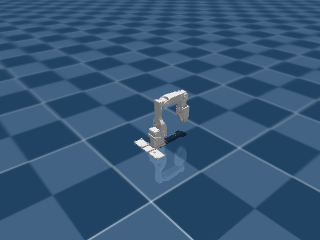
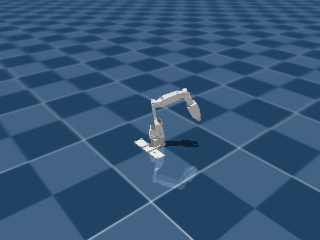

In [6]:
#Init variables.
body_id = model.site('TCP').id
jacp = np.zeros((3, model.nv)) #translation jacobian
jacr = np.zeros((3, model.nv)) #rotational jacobian
goal = [0.1, 0.1, 0.1]
step_size = 0.5
tol = 0.01
alpha = 0.5
init_q = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

ik = GradientDescentIK(model, data, step_size, tol, alpha, jacp, jacr)

#Get desire point
mujoco.mj_resetDataKeyframe(model, data, 1) #reset qpos to initial value
ik.calculate(goal, init_q, body_id) #calculate the q angles

result = data.qpos.copy()

#Plot results
print("Results")
data.qpos = qpos0
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera)
target_plot = renderer.render()

data.qpos = result
mujoco.mj_forward(model, data)
result_point = data.site('TCP').xpos
renderer.update_scene(data, camera)
result_plot = renderer.render()

print("testing point =>", target)
print("Gradient Descent result =>", result_point, "\n")

images = {
    'Testing point': target_plot,
    'Gradient Descent result': result_plot,
}

media.show_images(images)

## Gauss-Newton

error:[0.04845047 0.00941607 0.02309663]
error:[0.02306298 0.00851705 0.00998968]
error:[0.01127464 0.00490581 0.00465721]
error:[0.00558935 0.00258359 0.00226152]
Results
testing point => [0.09441065 0.09741641 0.09773848]
Gauss-Newton result => [0.09441065 0.09741641 0.09773848] 



Testing point,Gauss-Newton result

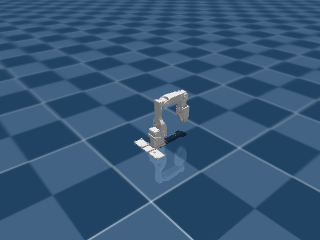
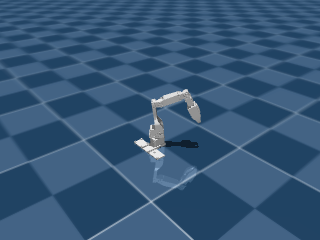

In [7]:
#Init variables.
body_id = model.site('TCP').id
jacp = np.zeros((3, model.nv)) #translation jacobian
jacr = np.zeros((3, model.nv)) #rotational jacobian
goal = [0.1, 0.1, 0.1]
step_size = 0.5
tol = 0.01
alpha = 0.5
init_q = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

ik = GaussNewtonIK(model, data, step_size, tol, alpha, jacp, jacr)

#Get desire point
mujoco.mj_resetDataKeyframe(model, data, 1) #reset qpos to initial value
ik.calculate(goal, init_q, body_id) #calculate the qpos

result = data.qpos.copy()

#Plot results
print("Results")
data.qpos = qpos0
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera)
target_plot = renderer.render()

data.qpos = result
mujoco.mj_forward(model, data)
result_point = data.site('TCP').xpos
renderer.update_scene(data, camera)
result_plot = renderer.render()

print("testing point =>", target)
print("Gauss-Newton result =>", result_point, "\n")

images = {
    'Testing point': target_plot,
    'Gauss-Newton result': result_plot,
}

media.show_images(images)

error:[ 0.08809345 -0.00579517  0.04366349]
error:[ 0.0849597  -0.00633783  0.04122948]
error:[ 0.08186708 -0.00687341  0.03881309]
error:[ 0.07881508 -0.00738517  0.03642414]
error:[ 0.07580558 -0.00785937  0.03407286]
error:[ 0.0728422  -0.00828524  0.03176955]
error:[ 0.06992963 -0.00865494  0.02952421]
error:[ 0.06707318 -0.00896331  0.02734631]
error:[ 0.06427826 -0.00920763  0.0252444 ]
error:[ 0.0615501  -0.00938731  0.02322598]
error:[ 0.05889346 -0.00950353  0.02129729]
error:[ 0.05631246 -0.00955892  0.01946321]
error:[ 0.05381049 -0.00955718  0.01772726]
error:[ 0.05139015 -0.00950278  0.0160916 ]
error:[ 0.04905326 -0.00940071  0.01455711]
error:[ 0.0468009  -0.00925622  0.01312349]
error:[ 0.04463345 -0.00907462  0.01178939]
error:[ 0.04255071 -0.00886115  0.01055257]
error:[ 0.04055191 -0.00862084  0.00941004]
error:[ 0.03863586 -0.00835844  0.00835818]
error:[ 0.03680099 -0.00807835  0.00739294]
error:[ 0.03504544 -0.00778463  0.00650991]
error:[ 0.03336709 -0.00748091  

Testing point,Levenberg-Marquardt result

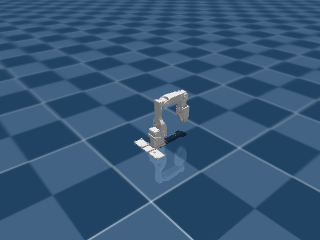
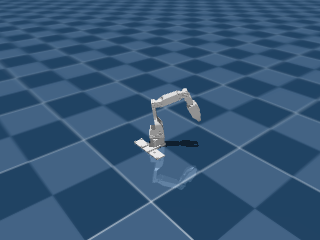

In [8]:
#Init variables.
body_id = model.site('TCP').id
jacp = np.zeros((3, model.nv)) #translation jacobian
jacr = np.zeros((3, model.nv)) #rotational jacobian
goal = [0.1, 0.1, 0.1]
step_size = 0.5
tol = 0.01
alpha = 0.5
init_q = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
damping = 0.15

ik = LevenbegMarquardtIK(model, data, step_size, tol, alpha, jacp, jacr, damping)

#Get desire point
mujoco.mj_resetDataKeyframe(model, data, 1) #reset qpos to initial value
ik.calculate(goal, init_q, body_id) #calculate the qpos

result = data.qpos.copy()

#Plot results
print("Results")
data.qpos = qpos0
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera)
target_plot = renderer.render()

data.qpos = result
mujoco.mj_forward(model, data)
result_point = data.site('TCP').xpos
renderer.update_scene(data, camera)
result_plot = renderer.render()

print("testing point =>", target)
print("Levenberg-Marquardt result =>", result_point, "\n")

images = {
    'Testing point': target_plot,
    'Levenberg-Marquardt result': result_plot,
}

media.show_images(images)

## Simulation

In [9]:
#Video Setup
DURATION = 10 #(seconds)
FRAMERATE = 60 #(Hz)
frames = []

#Reset state and time.
mujoco.mj_resetData(model, data)

#Init position.
# pi = np.pi
# data.qpos = [3*pi/2, -pi/2, pi/2, 3*pi/2, 3*pi/2, 0] #ENABLE if you want test circle

#Init parameters
jacp = np.zeros((3, model.nv)) #translation jacobian
jacr = np.zeros((3, model.nv)) #rotational jacobian
step_size = 0.5
tol = 0.01
alpha = 0.5
damping = 0.15

goal = [0.1, 0.1, 0.1]

current_pose = data.site('TCP').xpos
error = np.subtract(goal, current_pose)

def check_joint_limits(q):
    """Check if the joints is under or above its limits"""
    for i in range(len(q)):
        q[i] = max(model.jnt_range[i][0], min(q[i], model.jnt_range[i][1]))

def circle(t: float, r: float, h: float, k: float, f: float) -> np.ndarray:
    """Return the (x, y) coordinates of a circle with radius r centered at (h, k)
    as a function of time t and frequency f."""
    x = r * np.cos(2 * np.pi * f * t) + h
    y = r * np.sin(2 * np.pi * f * t) + k
    z = 0.5
    return np.array([x, y, z])

#Simulate
while data.time < DURATION:
    
    # goal = circle(data.time, 0.1, 0.5, 0.0, 0.5) #ENABLE to test circle.
    
    if (np.linalg.norm(error) >= tol):
        #Calculate jacobian
        # mujoco.mj_jac(model, data, jacp, jacr, goal, end_effector_id)
        mujoco.mj_jacSite(model, data, jacp, 
                          jacr, model.site("TCP").id)
        #Calculate delta of joint q
        n = jacp.shape[1]
        I = np.identity(n)
        product = jacp.T @ jacp + damping * I

        if np.isclose(np.linalg.det(product), 0):
            j_inv = np.linalg.pinv(product) @ jacp.T
        else:
            j_inv = np.linalg.inv(product) @ jacp.T

        delta_q = j_inv @ error

        #Compute next step
        q = data.qpos.copy()
        q += delta_q
        
        #Check limits
        check_joint_limits(data.qpos)
        
        #Set control signal
        data.ctrl = q 
        #Step the simulation.
        mujoco.mj_step(model, data)

        # error = np.subtract(goal, data.body(end_effector_id).xpos)
        error = np.subtract(goal, data.site('TCP').xpos)
        print(f"\033[H\033[2Jerror:{error}")
        
        
    #Render and save frames.
    if len(frames) < data.time * FRAMERATE:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)
        
#Display video.
media.show_video(frames, fps=FRAMERATE)

error:[ 0.091272 -0.005265  0.046106]
error:[ 0.09127202 -0.00526072  0.04611431]
error:[ 0.09127069 -0.00525088  0.04612094]
error:[ 0.09126803 -0.00523853  0.04612669]
error:[ 0.09126419 -0.00522486  0.04613185]
error:[ 0.09125926 -0.00521038  0.0461365 ]
error:[ 0.09125335 -0.00519534  0.04614069]
error:[ 0.09124656 -0.00517992  0.04614443]
error:[ 0.09123896 -0.00516422  0.04614773]
error:[ 0.09123064 -0.00514832  0.04615061]
error:[ 0.09122166 -0.00513231  0.0461531 ]
error:[ 0.09121208 -0.00511621  0.04615519]
error:[ 0.09120196 -0.00510008  0.04615693]
error:[ 0.09119135 -0.00508394  0.04615831]
error:[ 0.0911803  -0.00506783  0.04615937]
error:[ 0.09116885 -0.00505175  0.04616011]
error:[ 0.09115703 -0.00503572  0.04616056]
error:[ 0.09114489 -0.00501976  0.04616073]
error:[ 0.09113245 -0.00500387  0.04616064]
error:[ 0.09111974 -0.00498806  0.0461603 ]
error:[ 0.09110678 -0.00497234  0.04615973]
error:[ 0.09109361 -0.0049567   0.04615894]
error:[ 0.09108024 -0.00494115  0.0461